In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-27.16057214864236 -91.65103061823737
79.84842351398285 152.74852693389118
-1.9863003235942074 159.96904789696907
-28.48271122402999 -92.10789285560142
-31.02308314668342 -107.10221131673863
41.160870548192094 -82.08218271677124
-76.84627484785162 129.47621341932478
40.749736256049545 18.859288855762827
8.636789850422161 156.43286983650557
86.82041084602565 168.49141706440236
1.919573095028042 -100.55543393467852
-7.223711041996253 -97.41766024528759
20.41041479046895 3.461631561358672
-26.204002434045307 -173.45814462904292
81.09766763550147 111.9129127824317
-38.14342307593461 64.70001214282979
30.033524587335947 142.5609350122752
-6.8483226316727155 99.63059828841637
-53.65911129007385 114.04986681601093
69.66406135401249 -23.39338258100625
30.721047896458956 116.03370663731664
20.809146073187875 118.21391619073489
-8.709318105581474 170.32328205590693
41.78613977432326 39.28775892032374
81.11969018682933 84.47815785109424
-32.91015141723027 38.79411806415925
13.14757786467706 62.17

12.603618256003202 -114.49846623153188
-33.99408511453314 -136.71542388310797
-12.88596339650283 128.36991617011313
0.3938939509102539 -106.73596127195552
-30.59439695519488 7.055365594480776
-6.913809510222464 -111.98296901162914
4.285998009888971 119.10187662012487
89.55266986512575 64.58186875715958
-47.92377946934929 -73.3308811036117
-80.73177466313413 24.851479177831436
17.495575913723613 -55.690762468875405
-62.43264881048527 -133.7211470393698
-79.78107077343518 131.4182681045902
63.418866380764655 -119.6830379547235
52.67584752643492 51.19673554257872
-15.59218959667227 -4.14129753450311
-3.0610838634289053 54.580403379147526
-51.259012542877855 53.28824606447648
34.90796331160715 -173.36509865534023
-34.98810270197956 -140.93687999465982
-60.42453976897242 44.596203401162796
54.23919004054778 41.26378860540029
-72.25074077686683 120.51638622706002
66.88730503977678 -142.07786530726807
64.34396223589897 5.838418043793496
40.13781205867869 -28.68543544471561
38.27753245114641 1

In [11]:
from citipy import citipy

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marcona
City not found. Skipping...
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | kieta
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | elyria
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | vlore
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | tessalit
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | huangmei
Processing Record 21 of Set 1 | kaohsiung
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | quatre cocos
Processing Record 38 of Set 4 | xining
Processing Record 39 of Set 4 | nabire
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | birao
Processing Record 42 of Set 4 | powell river
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | trairi
Processing Record 45 of Set 4 | bambous virieux
Processing Record 46 of Set 4 | sorrento
Processing Record 47 of Set 4 | halalo
City not found. Skipping...
Processing Record 48 of Set 4 | byron bay
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | jumla
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | ust-kuyga
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | soto la marina
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | arraial do cabo
Processing Re

Processing Record 29 of Set 8 | ponta delgada
Processing Record 30 of Set 8 | almere
Processing Record 31 of Set 8 | ourossogui
Processing Record 32 of Set 8 | plettenberg bay
Processing Record 33 of Set 8 | dickinson
Processing Record 34 of Set 8 | benalla
Processing Record 35 of Set 8 | jacksonville beach
Processing Record 36 of Set 8 | tiarei
Processing Record 37 of Set 8 | asgabat
Processing Record 38 of Set 8 | mangla
Processing Record 39 of Set 8 | vestmanna
Processing Record 40 of Set 8 | kaufbeuren
Processing Record 41 of Set 8 | mahibadhoo
Processing Record 42 of Set 8 | kampot
Processing Record 43 of Set 8 | port hedland
Processing Record 44 of Set 8 | knysna
Processing Record 45 of Set 8 | toliary
City not found. Skipping...
Processing Record 46 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 8 | wanning
Processing Record 48 of Set 8 | midrand
Processing Record 49 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set

Processing Record 14 of Set 12 | eenhana
Processing Record 15 of Set 12 | mwanza
Processing Record 16 of Set 12 | walvis bay
Processing Record 17 of Set 12 | san ignacio
Processing Record 18 of Set 12 | kurchum
Processing Record 19 of Set 12 | oriximina
Processing Record 20 of Set 12 | olga
Processing Record 21 of Set 12 | half moon bay
Processing Record 22 of Set 12 | mandsaur
Processing Record 23 of Set 12 | carballo
Processing Record 24 of Set 12 | saint-fabien
City not found. Skipping...
Processing Record 25 of Set 12 | mbaiki
Processing Record 26 of Set 12 | tabuk
Processing Record 27 of Set 12 | novobirilyussy
Processing Record 28 of Set 12 | fortuna foothills
Processing Record 29 of Set 12 | bitung
Processing Record 30 of Set 12 | pelym
Processing Record 31 of Set 12 | san eugenio
Processing Record 32 of Set 12 | jilmah
City not found. Skipping...
Processing Record 33 of Set 12 | christchurch
Processing Record 34 of Set 12 | guajara-mirim
City not found. Skipping...
Processing R

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,43.34,44,100,13.98,RU,2022-09-19 02:33:59
1,Kieta,-6.2167,155.6333,81.77,83,100,6.51,PG,2022-09-19 02:33:59
2,Lebu,-37.6167,-73.6500,43.05,77,2,6.71,CL,2022-09-19 02:32:58
3,Rikitea,-23.1203,-134.9692,72.30,76,35,18.79,PF,2022-09-19 02:34:00
4,Elyria,41.3684,-82.1077,75.42,71,75,8.05,US,2022-09-19 02:34:00
5,New Norfolk,-42.7826,147.0587,61.72,64,65,5.99,AU,2022-09-19 02:34:00
6,Vlore,40.4667,19.4897,60.42,67,0,5.26,AL,2022-09-19 02:34:01
7,Kavieng,-2.5744,150.7967,83.16,74,100,10.71,PG,2022-09-19 02:34:01
8,Pevek,69.7008,170.3133,32.65,92,100,15.84,RU,2022-09-19 02:34:02
9,Puerto Ayora,-0.7393,-90.3518,67.55,88,60,3.00,EC,2022-09-19 02:31:16


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

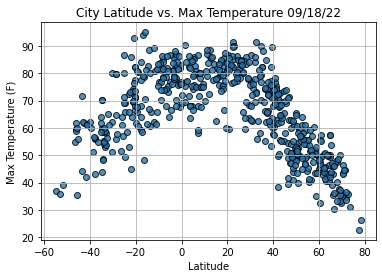

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

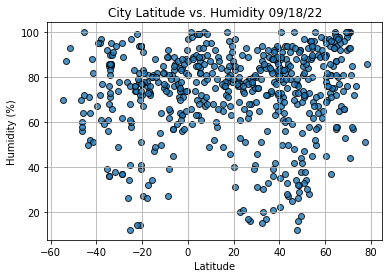

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


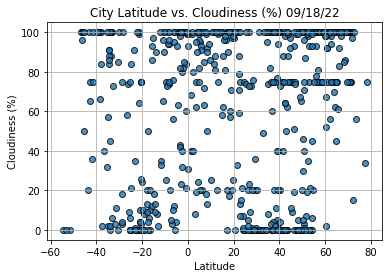

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


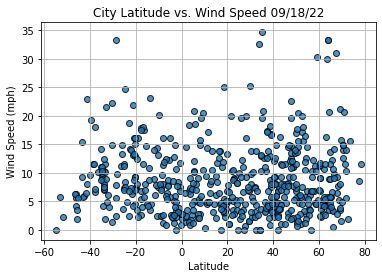

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

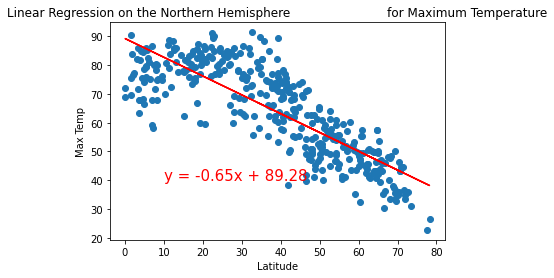

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

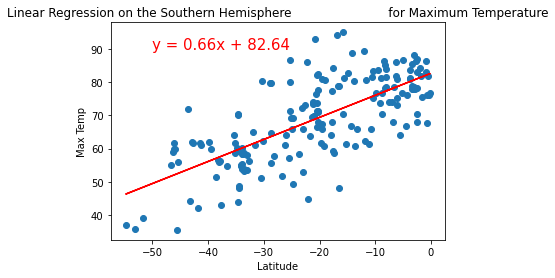

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

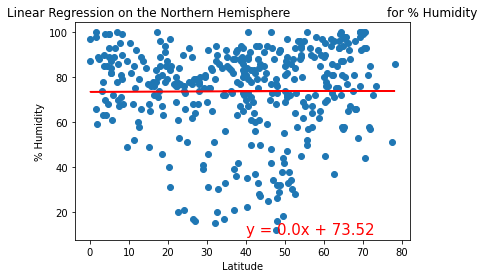

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

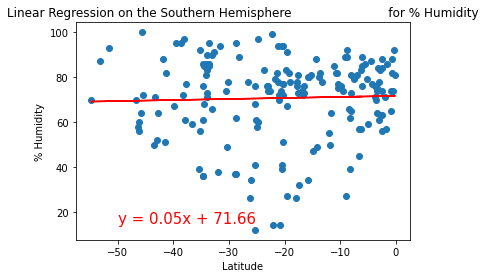

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


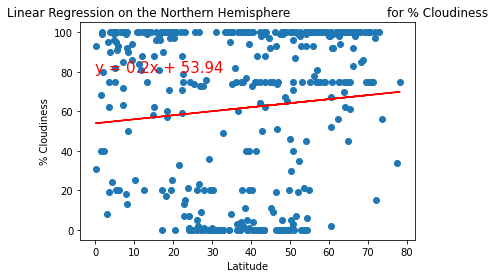

In [30]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0, 80))


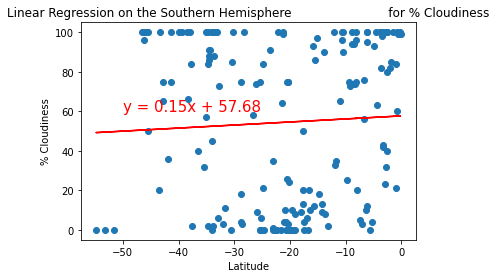

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

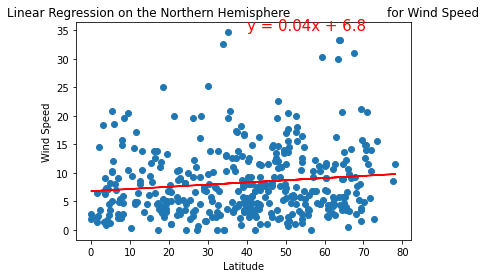

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

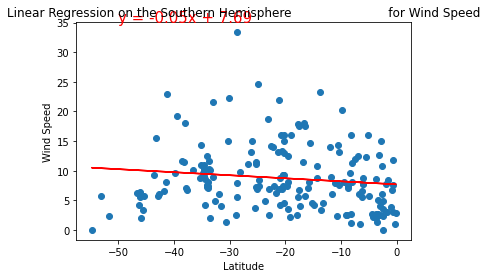

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))